In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier

import gensim
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn import metrics
#from sklearn import preprocessingcount
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=Warning)

from IPython.display import Audio 
from IPython.core.display import display
def mFinito():
       display(Audio('/Users/rogerrabbit/Downloads/here-we-go-mario.mp3', autoplay=True))

def _df_(x):
    return pd.DataFrame(x)


from collections import Counter

def _count(x):
    a = Counter(" ".join(x).split()).most_common(10000)
    a = _df_(a)
    return a

def _count_(x):
    a = Counter(" ".join(x).split()).most_common(10000)
    return a

def _graph_histo_(data,x,y, title, figsize, font):
    plt.figure(figsize=(figsize, figsize))
    sns.set(font_scale=font)
    ax = sns.barplot(x=x, y=y, data=a, orient='h', saturation=0.7)
    plt.xticks(rotation=80)
    plt.title(str(title), fontsize=35)
    return plt.show()

import time
tempsX = time.time()
def _time_():
    duration1 = time.time()-tempsX
    return print("temps de traitement       ",round(duration1/60,2), "minutes")

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Importation

In [2]:
mD= pd.read_csv('flipkart.csv')
mData = mD.copy()
mData.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{, {""key""=>""Model N..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


# Préparation

In [3]:
for i in range (0,7):
    mData['p_cat_%d' % i] = mData.product_category_tree.str.split('>>', expand = True)[i]

    
mData_p1 = mData[["p_cat_0","p_cat_1", "image", "description"]]

temp=mData_p1.p_cat_0.fillna("0")

mData_p1['Category'] =  pd.np.where(temp.str.contains("Home Furnishing"),"Home_Furnishing",
                        pd.np.where(temp.str.contains("Home Decor & Festive Needs"), "Home_Decor_Festive_Needs",
                        pd.np.where(temp.str.contains("Kitchen & Dining"), "Kitchen_Dining",
                        pd.np.where(temp.str.contains("Baby Care"), "Baby_Care",
                        pd.np.where(temp.str.contains("Computers"), "Computers",
                        pd.np.where(temp.str.contains("Beauty and Personal Care"), "Beauty_Personal_Care",
                        pd.np.where(temp.str.contains("Watches"), "Watches", "task")))))))

mData_p1 = mData_p1.rename(columns={"p_cat_1": "Product"})
mData_p1.Product = mData_p1.Product.str.split('"]', expand = True)[0]
mData_p1.pop('p_cat_0')
mData_p1["labels"] = LabelEncoder().fit_transform(mData_p1['Category'])

mData_p1 = mData_p1.drop(635)
mData_p1 = mData_p1.reset_index()

In [4]:
_time_()

temps de traitement        0.0 minutes


# Words

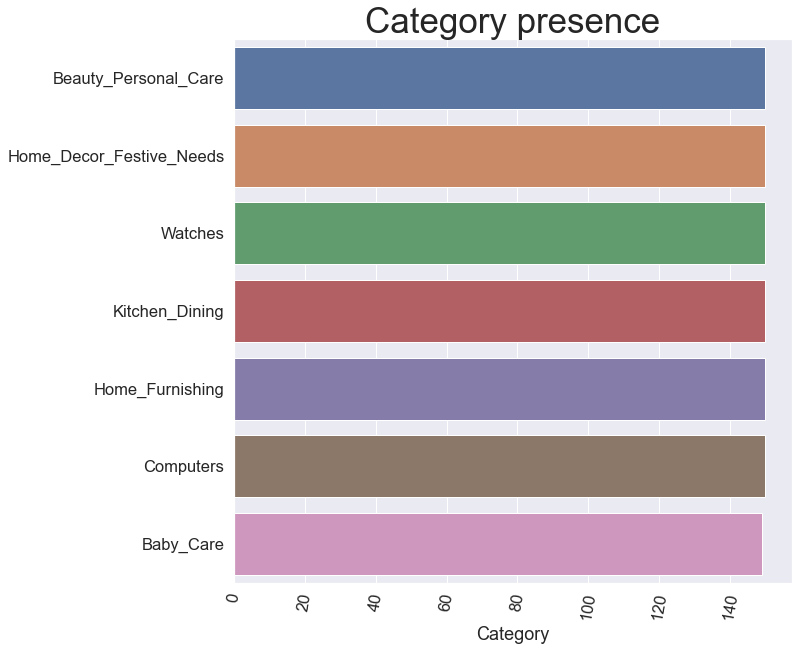

In [5]:
a = mData_p1.Category
a = a.value_counts()
a = pd.DataFrame(a)
_graph_histo_(a,"Category",a.index, "Category presence", 10, 1.5)

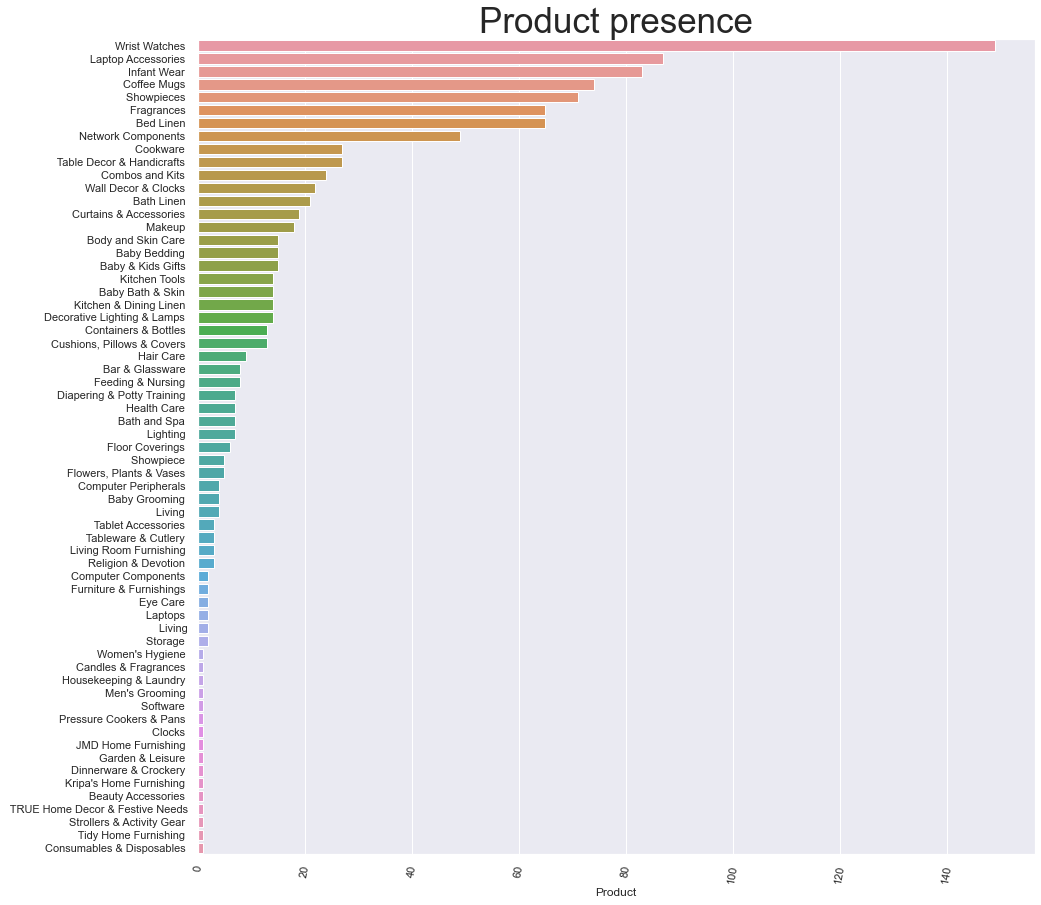

In [6]:
a = mData_p1.Product
a = a.value_counts()
a = pd.DataFrame(a)
_graph_histo_(a,"Product",a.index, "Product presence", 15, 1)

In [7]:
# Graph 3

In [8]:
item_lst = []
lst_Cat = ["Home_Furnishing",
           "Home_Decor_Festive_Needs",
           "Kitchen_Dining",
           "Baby_Care",
           "Computers",
           "Beauty_Personal_Care",
           "Watches"]

for xXx in lst_Cat:
    item = mData_p1.loc[mData_p1['Category'] == xXx]
    a = item.Product
    a = a.value_counts()
    a = pd.DataFrame(a)
    item_lst.append(a)
item_lst[0]

,Product
Bed Linen,65
Bath Linen,21
Curtains & Accessories,19
Kitchen & Dining Linen,14
"Cushions, Pillows & Covers",13
Floor Coverings,6
Living,4
Living Room Furnishing,3
Living,2
JMD Home Furnishing,1


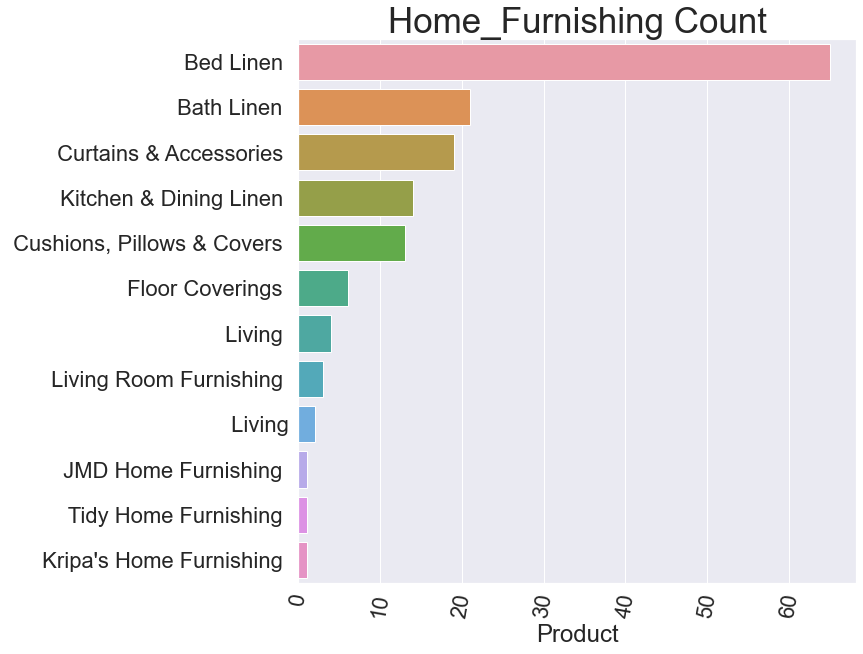

In [9]:
a = pd.DataFrame(item_lst[0])
_graph_histo_(a,"Product",a.index, "Home_Furnishing Count", 10, 2)

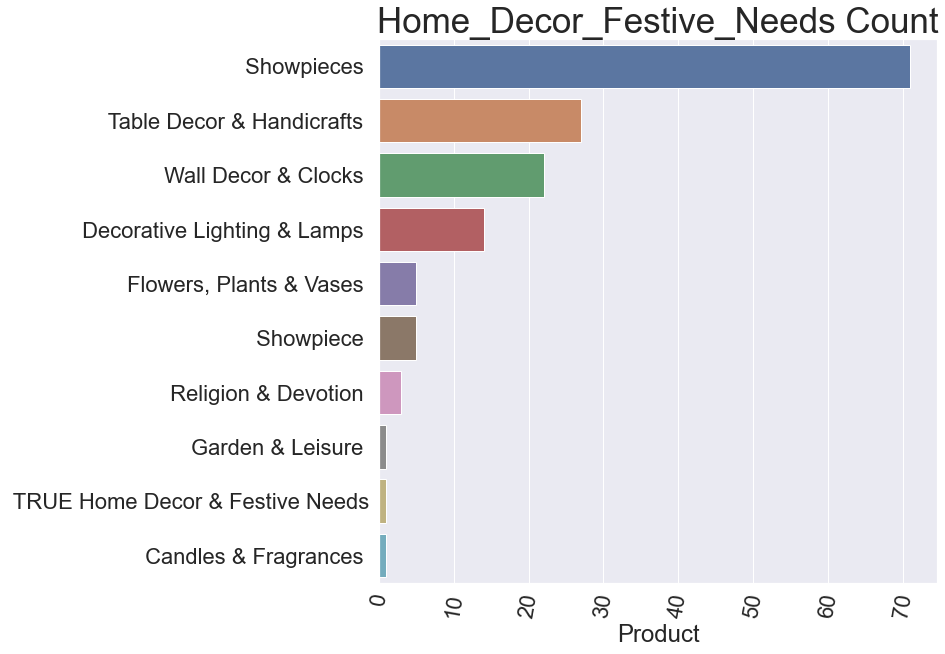

In [10]:
a = pd.DataFrame(item_lst[1])
_graph_histo_(a,"Product",a.index, "Home_Decor_Festive_Needs Count", 10, 2)

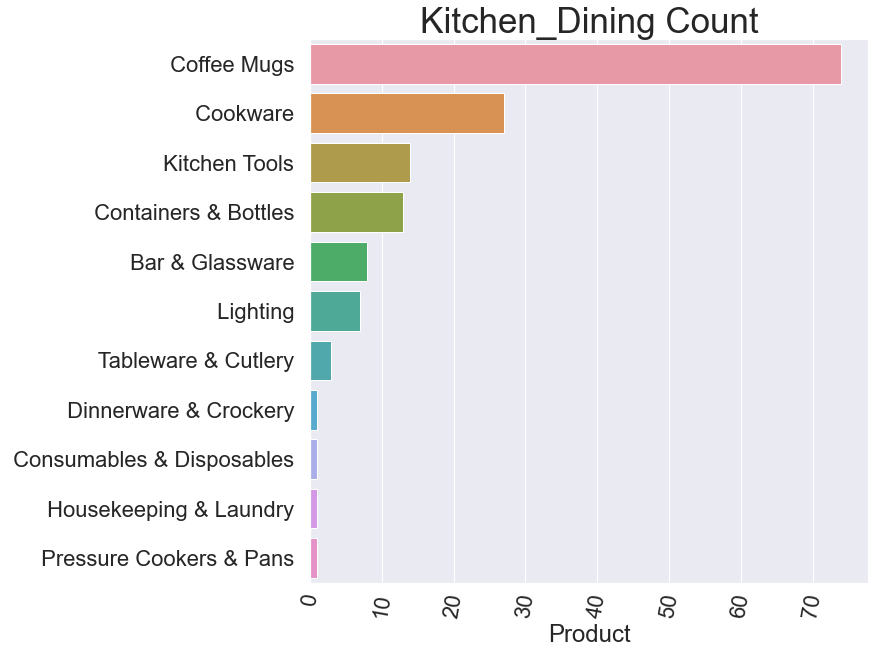

In [11]:
a = pd.DataFrame(item_lst[2])
_graph_histo_(a,"Product",a.index, "Kitchen_Dining Count", 10, 2)

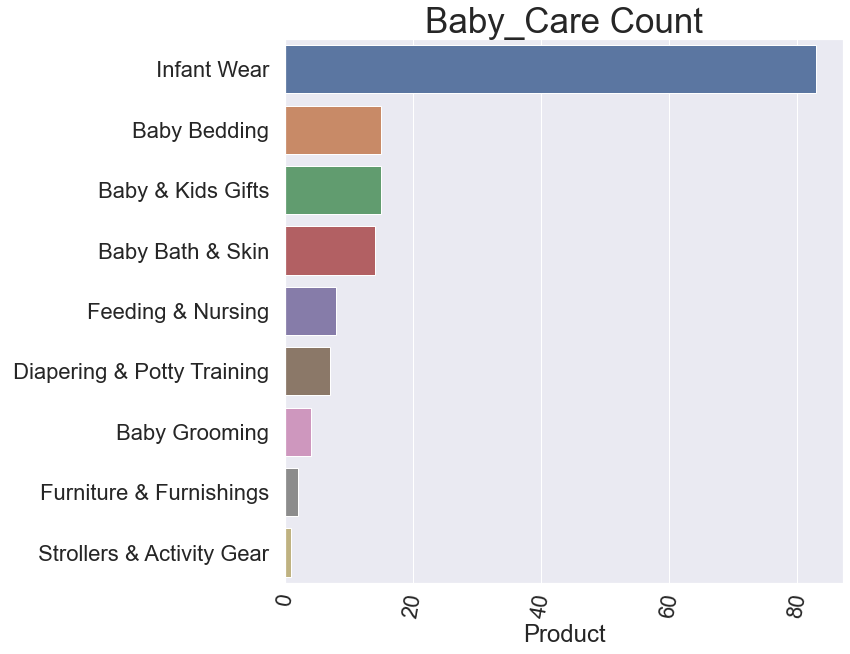

In [12]:
a = pd.DataFrame(item_lst[3])
_graph_histo_(a,"Product",a.index, "Baby_Care Count", 10, 2)

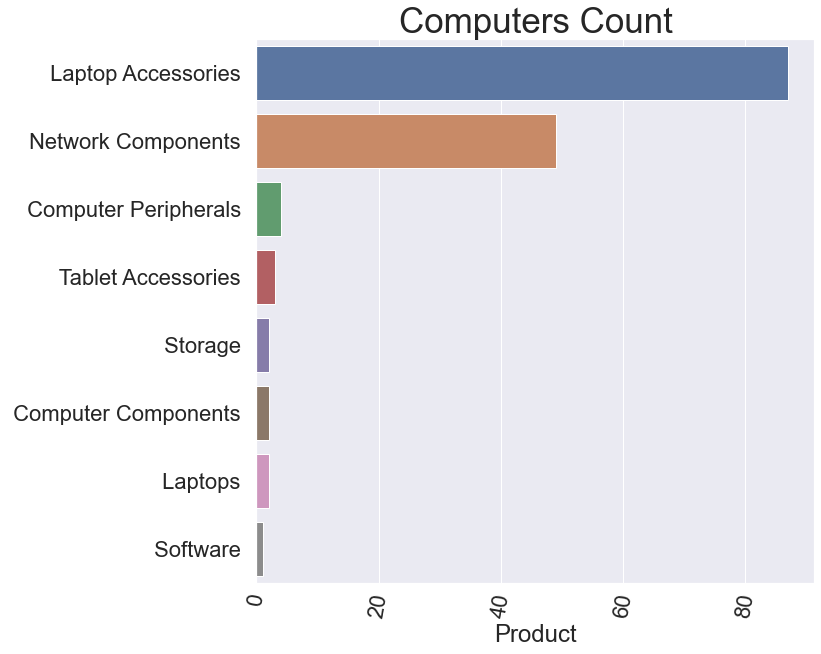

In [13]:
a = pd.DataFrame(item_lst[4])
_graph_histo_(a,"Product",a.index, "Computers Count", 10, 2)

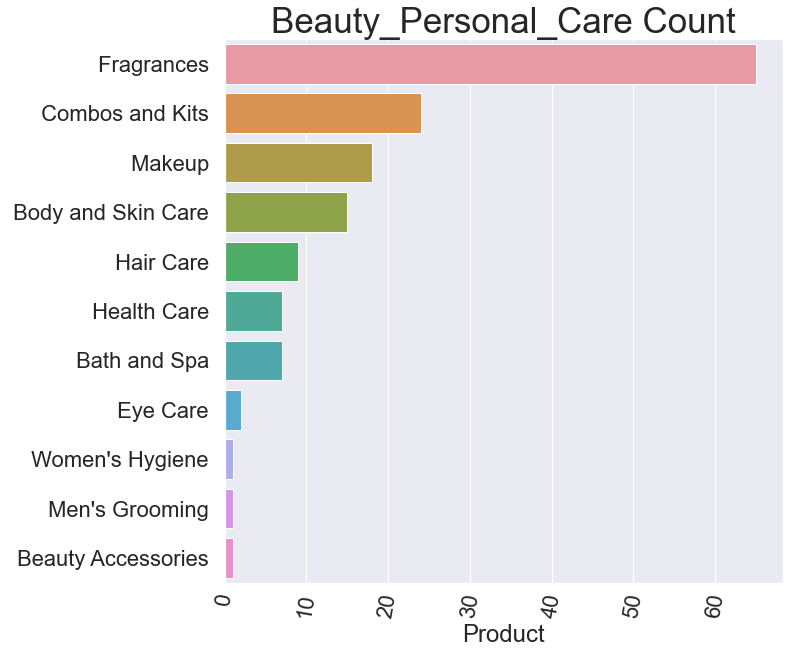

In [14]:
a = pd.DataFrame(item_lst[5])
_graph_histo_(a,"Product",a.index, "Beauty_Personal_Care Count", 10, 2)

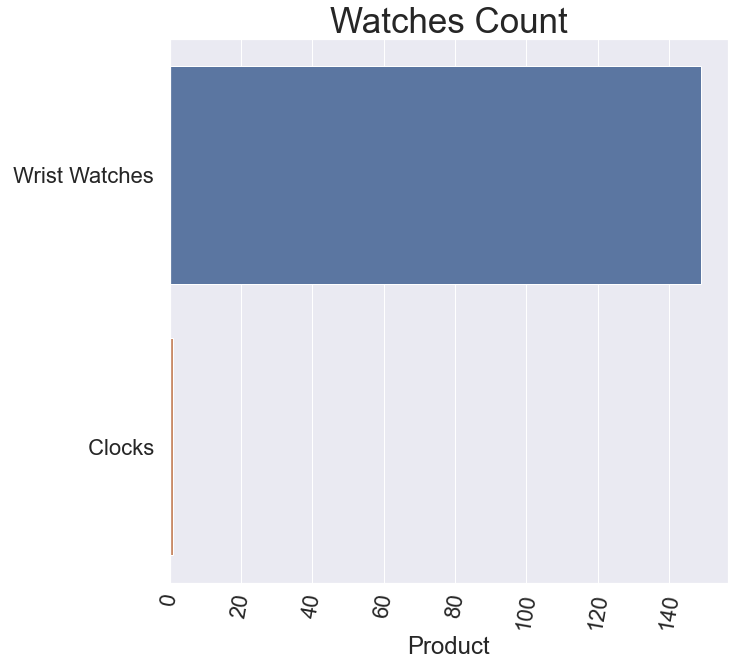

In [15]:
a = pd.DataFrame(item_lst[6])
_graph_histo_(a,"Product",a.index, "Watches Count", 10, 2)

In [16]:
_time_()

temps de traitement        0.07 minutes


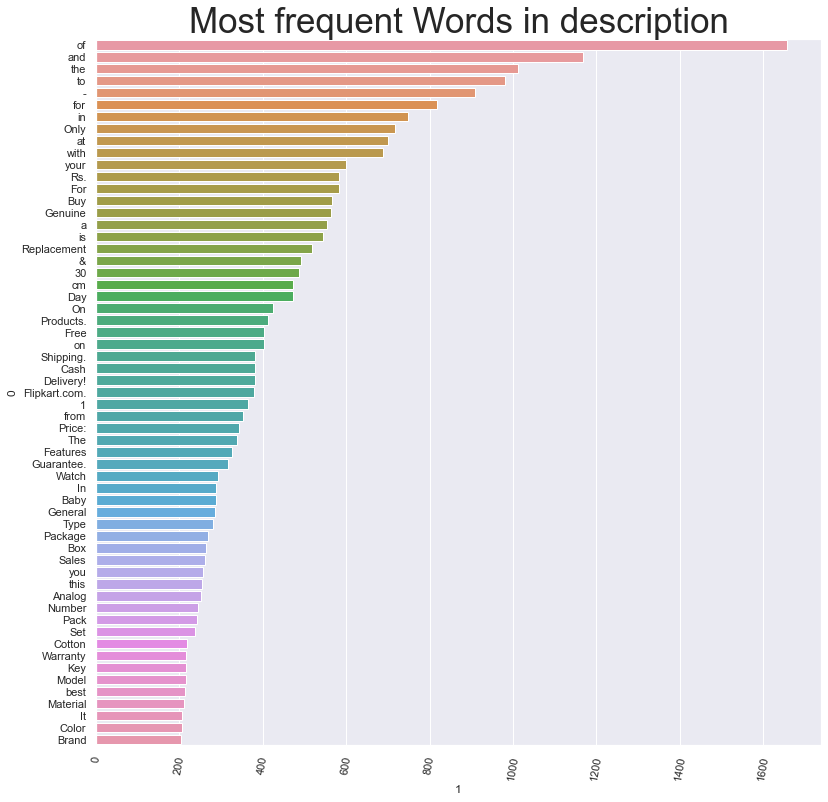

In [17]:
data_A = mData["description"]

a = _count(data_A)
a = a.loc[a[1] > 200]

_graph_histo_(a,a[1],a[0], "Most frequent Words in description", 13, 1)

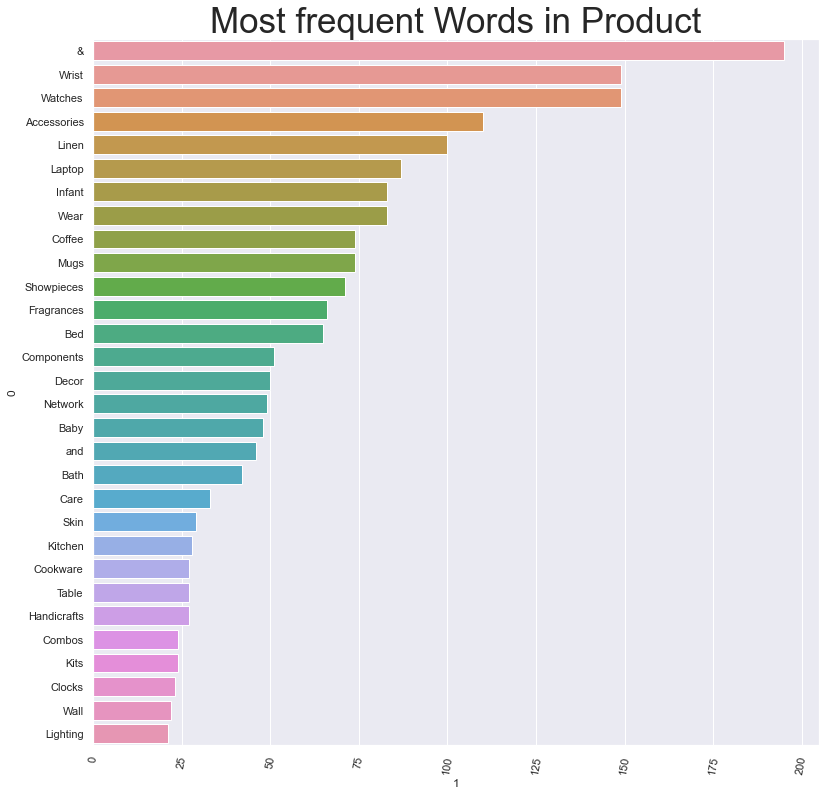

In [18]:
data_A = mData_p1["Product"]
data_A = pd.DataFrame(data_A)
a = _count(data_A.Product)
a = a.loc[a[1] > 20]
_graph_histo_(a,a[1],a[0], "Most frequent Words in Product", 13, 1)

In [19]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image

def _word_cloud(i, title):
   # mask = np.array(Image.open(path))
    #image_colors = ImageColorGenerator(mask)
    a = pd.DataFrame(item_lst[i])
    a =  a.reset_index()
    a = a["index"]
    a = pd.DataFrame(a)
    a = a.T
    a['new'] = a.apply(''.join, axis=1)
    a = pd.DataFrame(a['new'])
    a = a.iloc[0]['new']
    wordcloud = WordCloud(background_color = 'white').generate(a)
    plt.title(title, fontsize=15)
    plt.imshow(wordcloud)
    plt.axis("off")
    
    return plt.show()


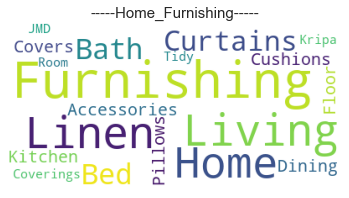

In [20]:
_word_cloud(0, "-----Home_Furnishing-----")

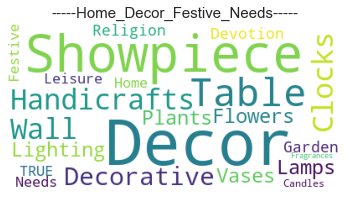

In [21]:
_word_cloud(1, "-----Home_Decor_Festive_Needs-----")

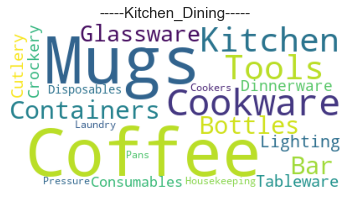

In [22]:
_word_cloud(2, "-----Kitchen_Dining-----")

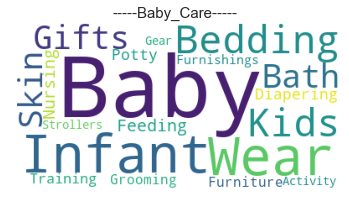

In [23]:
_word_cloud(3, "-----Baby_Care-----")

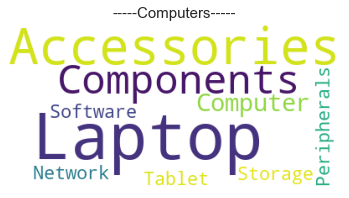

In [24]:
_word_cloud(4, "-----Computers-----")

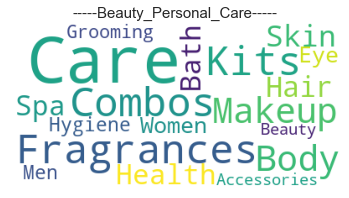

In [25]:
_word_cloud(5, "-----Beauty_Personal_Care-----")

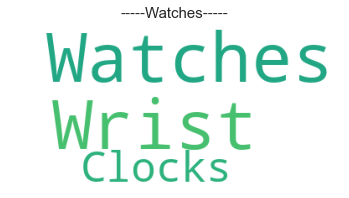

In [26]:
_word_cloud(6, "-----Watches-----")

# Image

In [27]:
_time_()

temps de traitement        0.13 minutes


In [28]:
mData_pX = mData_p1[["image","Category","labels"]]
mData_pX = mData_pX.rename(columns={'image': 'image_path','label' : 'labels', 'Category' : 'label_name'})
list_labels = np.unique(mData_pX.label_name.to_numpy())

Baby_Care


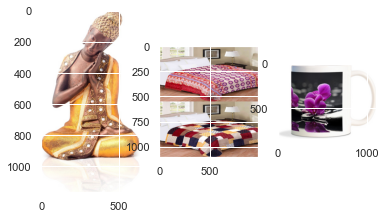

Beauty_Personal_Care


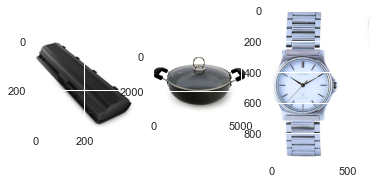

Computers


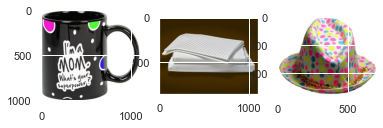

Home_Decor_Festive_Needs


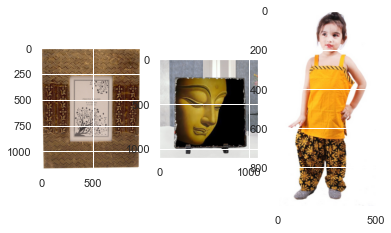

Home_Furnishing


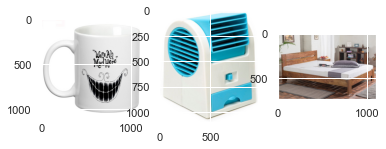

Kitchen_Dining


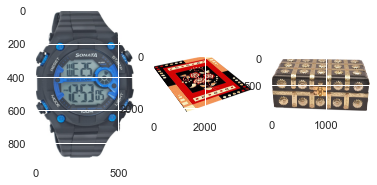

Watches


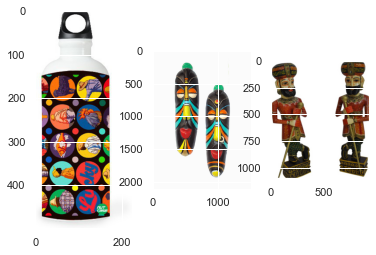

In [29]:
from matplotlib.image import imread
from os import listdir
path = "_img_/"

list_photos = [file for file in listdir(path)]

def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(mData_pX)) if mData_pX["label_name"][i]==name]
    return list_image_name

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+3]
        image = imread(filename)
        plt.imshow(image)
    plt.show()


from PIL import Image
import glob

mFiles_list = []
for filename in glob.glob('new_img/*.jpg'): #assuming gif
    #im=Image.open(filename)
    mFiles_list.append(filename)

From left to right: Original, Autocontrast, Histogram equalized


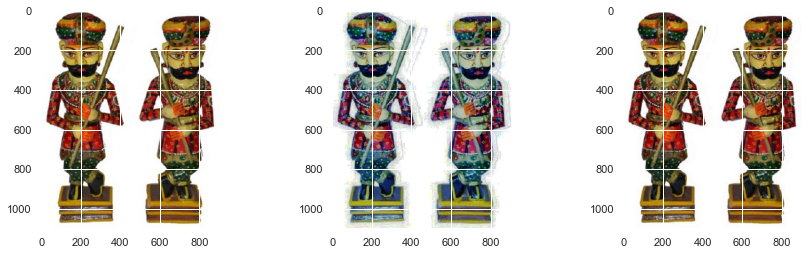

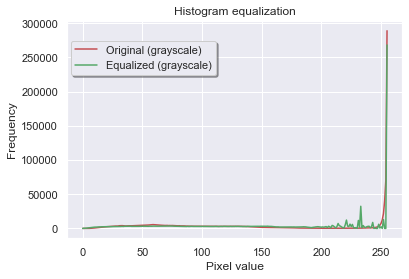

In [30]:
from PIL import Image, ImageOps
from sklearn import preprocessing
from sklearn import decomposition

imgOri = Image.open("new_img/233-Home_Decor_Festive_Needs.jpg")
img_hist_eq = ImageOps.equalize(imgOri)
img_contrast = ImageOps.autocontrast(imgOri, cutoff=0.2) #20%

imgOri_gs = imgOri.convert("L")  # grayscale to study histogram
img_hist_eq_gs = img_hist_eq.convert("L")  # grayscale to study histogram

print('From left to right: Original, Autocontrast, Histogram equalized')
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(141)  # top left side
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax1.imshow(imgOri)
ax2.imshow(img_hist_eq)
ax3.imshow(img_contrast)
plt.show()

bins = list(range(256))
plt.plot(bins, imgOri_gs.histogram(), 'r')
plt.plot(bins, img_hist_eq_gs.histogram(), 'g')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Histogram equalization')
plt.legend(
    ('Original (grayscale)', 'Equalized (grayscale)'),
     shadow=True, loc=(0.01, 0.75))
plt.grid(True)
plt.show()




From left to right: original,Gaussian filtered, Median filtered


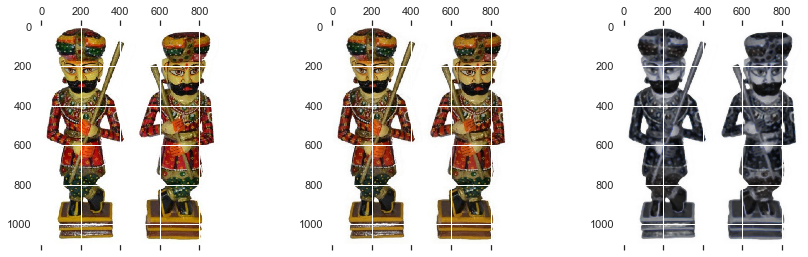

In [31]:
matOri = np.array(imgOri)
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter
result_gauss = gaussian_filter(matOri, sigma=0.5)
result_salt_pepper = median_filter(matOri, size=10)

print('From left to right: original,Gaussian filtered, Median filtered')
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(141)  # top left side
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax1.matshow(matOri)
ax2.matshow(result_gauss)
ax3.matshow(result_salt_pepper)
plt.show()



# TXT PROCESS

In [32]:
_time_()

temps de traitement        0.63 minutes


In [33]:
def data_preprocess(dataframe, column):
    
    custom_blank_text='non ascii symbols punctuations numbers'
    
    
    dataframe['Desc_Modified_1'] = dataframe[column].str.lower()
    dataframe['Desc_Modified_1'] = dataframe['Desc_Modified_1'].str.replace(r'features', '')
    dataframe['Desc_Modified_1'] = dataframe['Desc_Modified_1'].str.replace(r'key', '')
    dataframe['Desc_Modified_1'] = dataframe['Desc_Modified_1'].str.replace(r'specifications', '')
    dataframe['Desc_Modified_1'] = dataframe['Desc_Modified_1'].str.replace(r'buy', '')
    dataframe['Desc_Modified_1'] = dataframe['Desc_Modified_1'].str.replace(r'fit', '')
    dataframe['Desc_Modified_1'] = dataframe['Desc_Modified_1'].str.replace(r'flap', '')
    dataframe['Desc_Modified_1'] = dataframe['Desc_Modified_1'].str.replace(r'flash', '')

    # Remove numbers
    dataframe['Desc_Modified_2'] = dataframe['Desc_Modified_1'].str.replace(r'\d', '')

    # Punctuation
    dataframe['Desc_Modified_3'] = dataframe['Desc_Modified_2'].str.replace(r'[^\w\s]+', ' ')

    # Remove stopwords
    stop = stopwords.words('english')
    dataframe['Desc_Modified_4'] = dataframe['Desc_Modified_3'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    # Lemmatize words
    wnl = WordNetLemmatizer()

    def lemmatize_all(sentence):
        text = list()
        for word, tag in nltk.pos_tag(str.split(sentence)):
            if tag.startswith("NN"):
                text.append(wnl.lemmatize(word, pos='n'))
            elif tag.startswith('VB'):
                text.append(wnl.lemmatize(word, pos='v'))
            elif tag.startswith('JJ'):
                text.append(wnl.lemmatize(word, pos='a'))
            else:
                text.append(word)
        return ' '.join(text)

    dataframe['Desc_Modified_5'] = dataframe['Desc_Modified_4'].apply(lambda sentence: ' '.join([lemmatize_all(sentence)]))

    # Replacing blanks 
    #dataframe['Desc_Modified_6'] = dataframe['Desc_Modified_5'].replace(r'^\s*$', custom_blank_text, regex=True, inplace=True)

    # Replacing blanks 
    #dataframe['Desc_Modified_7'] = dataframe['Desc_Modified_6'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
    
    return dataframe



In [34]:
mData_txt = data_preprocess(mData_p1,'description')
mData_txt.columns

Index(['index', 'Product', 'image', 'description', 'Category', 'labels',
       'Desc_Modified_1', 'Desc_Modified_2', 'Desc_Modified_3',
       'Desc_Modified_4', 'Desc_Modified_5'],
      dtype='object')

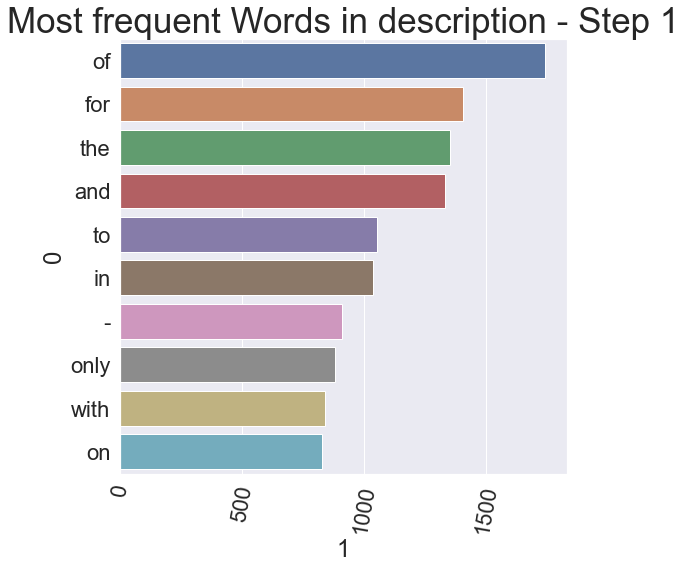

In [35]:
data_A = mData_txt["Desc_Modified_1"]
a = _count(data_A)
a = a.head(10)
_graph_histo_(a,a[1],a[0], "Most frequent Words in description - Step 1", 8, 2)

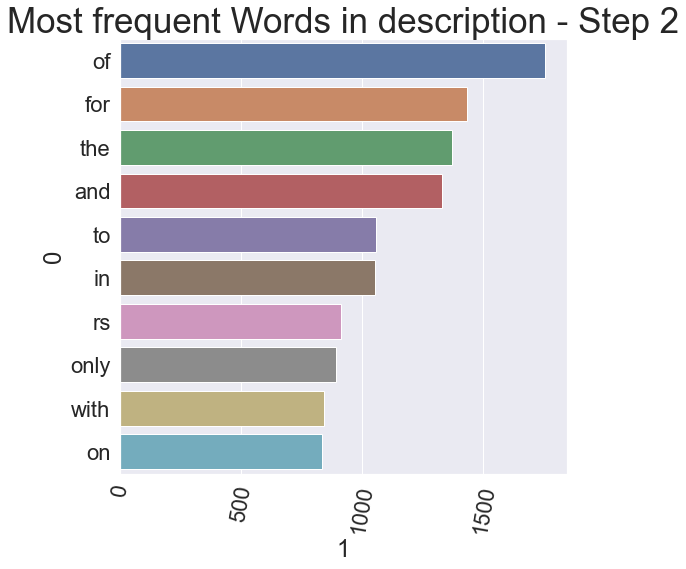

In [36]:
data_A = mData_txt["Desc_Modified_3"]
a = _count(data_A)
a = a.head(10)
_graph_histo_(a,a[1],a[0], "Most frequent Words in description - Step 2", 8, 2)

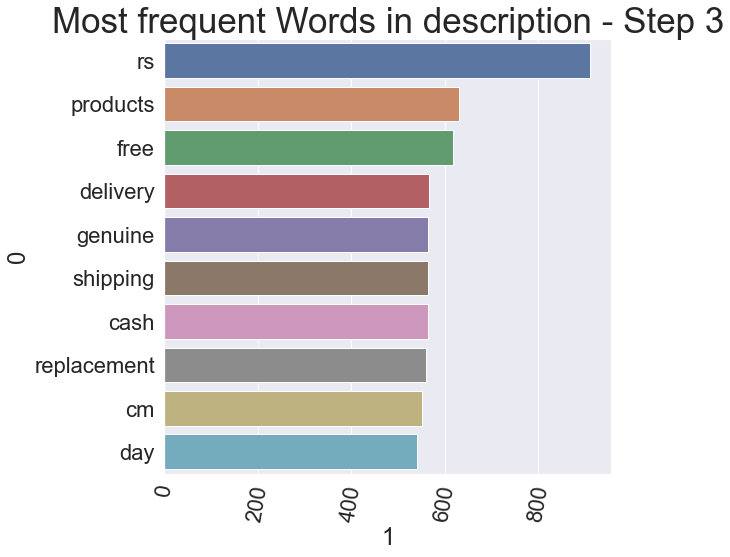

In [37]:
data_A = mData_txt["Desc_Modified_4"]
a = _count(data_A)
a = a.head(10)
_graph_histo_(a,a[1],a[0], "Most frequent Words in description - Step 3", 8, 2)

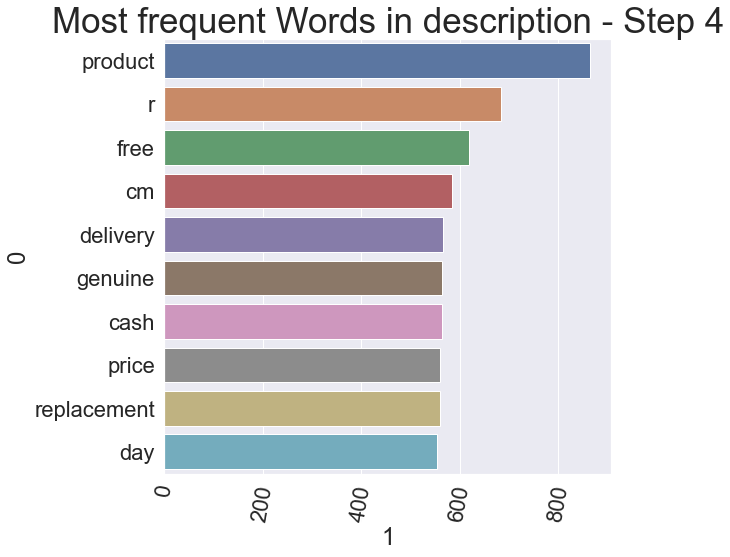

In [38]:
data_A = mData_txt["Desc_Modified_5"]
a = _count(data_A)
a = a.head(10)
_graph_histo_(a,a[1],a[0], "Most frequent Words in description - Step 4", 8, 2)

In [39]:
_time_()

temps de traitement        0.74 minutes


In [40]:
#DataProc ok

from gensim.models import KeyedVectors

def data_preprocess(dataframe, labels):
        text = []
        dataframe['Desc_Modified'] = dataframe["description"].str.lower()
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'features', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'key', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'specifications', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'buy', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'fit', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'flap', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'flash', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'\d', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(r'[^\w\s]+', ' ')
        stop = stopwords.words('english')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
        
        def lem(mB):
            sentence = mB
            word_list = nltk.word_tokenize(sentence)
            lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
            return lemmatized_output
                                                                                         
        custom_blank_text='non ascii symbols punctuations numbers'
        dataframe['Desc_Modified'] = dataframe.Desc_Modified.apply(lambda x : lem(x))
        dataframe['Desc_Modified'].replace(r'^\s*$', custom_blank_text, regex=True, inplace=True)
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].apply(
            lambda x: re.sub("\s\s+", " ", str(x.strip())))
        dataframe = dataframe['Desc_Modified'] 
        
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(dataframe)
        terms = tfidf_vectorizer.get_feature_names()
        arr = []
        for i in range(0, tfidf_matrix.shape[0]):
            row = np.squeeze(tfidf_matrix[i].toarray())
            top_ids = np.argsort(row)[::-1][:10]
            feats = [terms[i] for i in top_ids]
            arr.append(feats)
        
        data01 = pd.DataFrame(arr)
        data01['Desc_Modified'] = pd.Series(data01.fillna('').values.tolist()).str.join(' ')
        mC = _df_(data01.Desc_Modified)
        data = labels.join(mC)
        data['description'] = data.Desc_Modified
        data.pop('Desc_Modified')
        filename = 'glove.6B.300d.w2vformat.txt'
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
        data['description'] = data['description'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
        counts = data["description"].str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts')
        non_glove_words = list()
        glove_words = list()
        for i in counts['unique_words']:
            try:
                model.get_vector(i)
            except KeyError:
                non_glove_words.append(i)
            else:
                glove_words.append(i)
        
        non_glove_words_df = pd.DataFrame({'unique_non_glove_words': non_glove_words})
        non_glove_words_df = pd.merge(non_glove_words_df, counts, how='left', left_on=['unique_non_glove_words'], right_on=['unique_words']).iloc[:, [0, 2]]
        non_glove_words_df['cum_perc'] = round(100*non_glove_words_df["counts"].cumsum()/non_glove_words_df["counts"].sum(), 2)
        
        j = 0
        length = len(non_glove_words_df['unique_non_glove_words'])-1
        for i in non_glove_words_df['unique_non_glove_words']:
            data["description"].replace(r'(\b)+%s+(\b)' %i, ' ', regex=True, inplace=True)
            if j == length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j % 10 == 0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j += 1
            
        data["description"] = data["description"].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
        
        data['Length_Glove_Words'] = data.description.str.split().str.len()
        
        def blank_words(row, n):
            for i in range(1, n+1):
                if row['Length_Glove_Words'] == i:
                    return ' blank' * (n-i)
                
        data['Words'] = data.apply(lambda row: blank_words(row, 10), axis=1)
        data['Top_Words'] = data.description.fillna('') + data['Words'].fillna('')
        mTest = data.copy()
        mTest.pop("description")
        mTest.pop("Length_Glove_Words")
        mTest.pop("Words")
        X = mTest.Top_Words.tolist()
        return X


In [41]:
X = data_preprocess(mData_p1, pd.DataFrame(mData_p1['labels']))
X = pd.DataFrame(X)

Progress:  100%

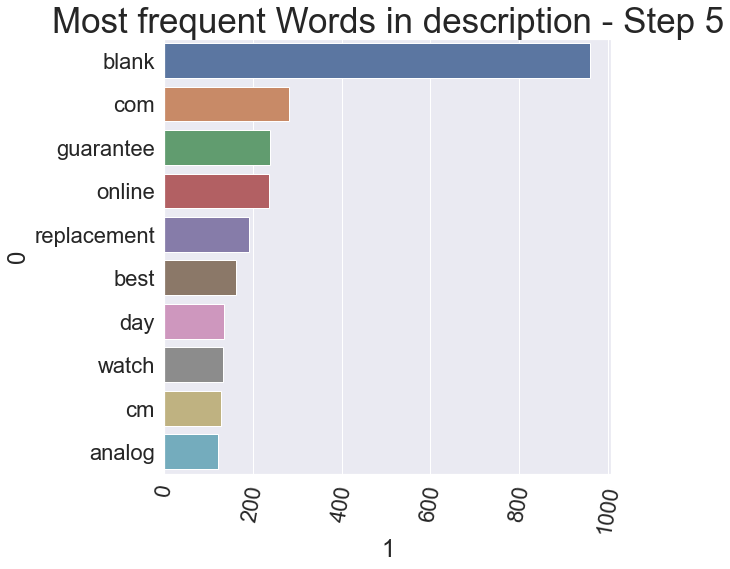

In [42]:



data_A = X[0]
a = _count(data_A)
a = a.head(10)
_graph_histo_(a,a[1],a[0], "Most frequent Words in description - Step 5", 8, 2)

# Classification IMG

## Classification Non-Supervisé

##### import

In [43]:
mData_p1

,index,Product,image,description,Category,labels,Desc_Modified_1,Desc_Modified_2,Desc_Modified_3,Desc_Modified_4,Desc_Modified_5,Desc_Modified
0,0,Curtains & Accessories,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home_Furnishing,4,of elegance polyester multicolor abstract ey...,of elegance polyester multicolor abstract ey...,of elegance polyester multicolor abstract ey...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...
1,1,Baby Bath & Skin,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby_Care,0,"of sathiyas cotton bath towel (3 bath towel, ...","of sathiyas cotton bath towel ( bath towel, r...",of sathiyas cotton bath towel bath towel r...,sathiyas cotton bath towel bath towel red yell...,sathiyas cotton bath towel bath towel red yell...,sathiyas cotton bath towel bath towel red yell...
2,2,Baby Bath & Skin,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby_Care,0,of eurospa cotton terry face towel set size:...,of eurospa cotton terry face towel set size:...,of eurospa cotton terry face towel set size ...,eurospa cotton terry face towel set size small...,eurospa cotton terry face towel set size small...,eurospa cotton terry face towel set size small...
3,3,Bed Linen,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home_Furnishing,4,of santosh royal fashion cotton printed king...,of santosh royal fashion cotton printed king...,of santosh royal fashion cotton printed king...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton print king size d...,santosh royal fashion cotton printed king size...
4,4,Bed Linen,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home_Furnishing,4,of jaipur print cotton floral king sized dou...,of jaipur print cotton floral king sized dou...,of jaipur print cotton floral king sized dou...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king size double be...,jaipur print cotton floral king sized double b...
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1045,Baby & Kids Gifts,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Baby_Care,0,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...
1045,1046,Baby & Kids Gifts,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby_Care,0,wallmantra large vinyl sticker sticker (pack o...,wallmantra large vinyl sticker sticker (pack o...,wallmantra large vinyl sticker sticker pack o...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...,wallmantra large vinyl sticker sticker pack pr...
1046,1047,Baby & Kids Gifts,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby_Care,0,uberlyfe extra large pigmented polyvinyl film...,uberlyfe extra large pigmented polyvinyl film...,uberlyfe extra large pigmented polyvinyl film...,uberlyfe extra large pigmented polyvinyl films...,uberlyfe extra large pigment polyvinyl film im...,uberlyfe extra large pigmented polyvinyl film ...
1047,1048,Baby & Kids Gifts,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby_Care,0,wallmantra medium vinyl sticker sticker for r...,wallmantra medium vinyl sticker sticker for r...,wallmantra medium vinyl sticker sticker for r...,wallmantra medium vinyl sticker sticker rs onl...,wallmantra medium vinyl sticker sticker r onli...,wallmantra medium vinyl sticker sticker r onli...


##### Vector SIFT

array(['009099b1f6e1e8f893ec29a7023153c4.jpg',
       '0096e89cc25a8b96fb9808716406fe94.jpg',
       '00cbbc837d340fa163d11e169fbdb952.jpg', ...,
       'ffbf3794aa8cb6bb8d3f313d0a549a09.jpg',
       'ffc2e1fc7c886ec09a331040ada038aa.jpg',
       'fffa2117a4006d4a848eb7d5b80d4816.jpg'], dtype=object)

In [45]:
from tqdm import tqdm
import cv2


sift_keypoints = []
_for_target = []

sift = cv2.xfeatures2d.SIFT_create()

k=0
for i in tqdm(list_image_path):
    j = '_img_/'+str(i)
    a = cv2.imread(j)
    b = cv2.resize(a, (224, 224), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    kps = sift.detect(gray,None)
    c = cv2.drawKeypoints(gray,kps,gray,(0,0,255))
    _, des = sift.detectAndCompute(a, None)
    if des is None:
        print(i, "--Error", "nb---", k)
    else :
        sift_keypoints.append(des)
        _for_target.append(i)
    k+=1
        
sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis=0)


print("Nombre de descripteurs : ", sift_keypoints_all.shape)

     ]

SyntaxError: invalid syntax (<ipython-input-45-0aa35d591589>, line 2)

#### Cluster 1

In [ ]:


from sklearn import cluster, metrics

#Cluster de tous les descripteurs (pas les images)
#Chaque descripteur = Cluster

k = 700

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)



In [ ]:
mFinito()

#### Creation Histogramme + Matrice

In [ ]:
def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) 
    hist_vectors.append(hist)

im_features = np.asarray(hist_vectors)

#Im Feature = Cluster affecté a chaque desc



In [ ]:
#### Reduction Dimension

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(im_features)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


In [ ]:
mData_clus = mData_p1[["image","labels"]]
mData_clus = mData_clus.sort_values(by=['image'])
mData_clus = mData_clus[mData_clus.image != '9743e6d1c9f3180483825fe4d2e97836.jpg']
y  = pd.DataFrame(mData_clus.labels).reset_index()
y

In [ ]:
from sklearn import manifold, decomposition

#On fait double Reduction dim

# 1 - PCA 
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.9)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

# 2 - T-Sne 
from sklearn import manifold, decomposition
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = mData_p1["Category"]
print(df_tsne.shape)

_time_()

In [ ]:
df_tsne = df_tsne.join(y)
df_tsne

In [ ]:
#### Graph Clusters - 1

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE - Cluster reel', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


#### Cluster 2

In [ ]:
from sklearn import cluster, metrics
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)
df_tsne["cluster"] = cls.labels_
df_tsne

In [ ]:

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_tsne)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE - Cluster Trouvé', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [ ]:
df_tsne = df_tsne.rename(columns={'labels': 'cluster_reel','cluster' : 'cluster_trouve'})
df_tsne["cluster_reel"] = LabelEncoder().fit_transform(df_tsne['cluster_reel'])
_time_()

In [ ]:
#### ARI SCORE

In [ ]:
print(" Accuracy Score -> ",accuracy_score(df_tsne.cluster_trouve, df_tsne.cluster_reel)*100)
print("ARI : ", metrics.adjusted_rand_score(df_tsne.cluster_trouve, df_tsne.cluster_reel))

In [ ]:
#### Metrics

In [ ]:
cm = confusion_matrix(df_tsne.cluster_trouve, df_tsne.cluster_reel)

cm_df = pd.DataFrame(cm)
plt.pcolor(cm_df)
plt.yticks(np.arange(0.5, len(cm_df.index), 1), cm_df.index)
plt.xticks(np.arange(0.5, len(cm_df.columns), 1), cm_df.columns)
plt.show()

In [ ]:
sns.heatmap(cm, cmap="YlGnBu")
plt.show()

## Classification Supervisé

In [ ]:
df_tsne

X_img_for_reu = df_tsne.copy()

In [ ]:
X = df_tsne[["tsne1","tsne2"]]
y = df_tsne.cluster_reel

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)


In [ ]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)



Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)

# predict 
predictions_NB = Naive.predict(X_test)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)
print("ARI : ", metrics.adjusted_rand_score(predictions_NB,y_test))

In [ ]:
# W/ default hyperparameters

svc=SVC() 
svc.fit(X_train,y_train)

# predict 
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)
plt.pcolor(cm_df)
plt.yticks(np.arange(0.5, len(cm_df.index), 1), cm_df.index)
plt.xticks(np.arange(0.5, len(cm_df.columns), 1), cm_df.columns)
plt.show()

In [ ]:

#BY PASS

# HyperParameter Search W/ GridSearchCV
#svc=SVC() 
##param_grid = { 'C':[0.1,1,100,1000],'kernel':['poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
#grid_search = GridSearchCV(estimator = svc,   param_grid = param_grid, scoring = 'accuracy', cv = 5, verbose=0)
#grid_search.fit(X_train, y_train)

# ***** THE BEST *****

#print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
#print('Parameters for best results :','\n\n', (grid_search.best_params_))

#_time_()

# -------- svc=SVC(C = 1000, degree =  4, gamma = 1, kernel =  'poly')  --------

In [ ]:
# W/ GridSearch Application des hyperparameters
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC(C = 1000, degree =  4, gamma = 1, kernel =  'poly') 
svc.fit(X_train,y_train)

# predict 
y_pred=svc.predict(X_test)


print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)
plt.pcolor(cm_df)
plt.yticks(np.arange(0.5, len(cm_df.index), 1), cm_df.index)
plt.xticks(np.arange(0.5, len(cm_df.columns), 1), cm_df.columns)
plt.show()

In [ ]:
sns.heatmap(cm, cmap="YlGnBu")
plt.show()

# Classification TXT

In [ ]:
mData_p1.head(2)

In [49]:


def data_preprocess(dataframe, column, lower, remove_key=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers'):
    # Lower case
    if lower == True:
        dataframe['Desc_Modified'] = dataframe[column].str.lower()

    # Remove characters
    if remove_key == True:
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'features', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'key', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'specifications', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'buy', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'fit', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'flap', '')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'flash', '')

    # Remove numbers
    if no_numbers == True:
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'\d', '')

    # Punctuation
    if no_punctuation == True:
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].str.replace(
            r'[^\w\s]+', ' ')

    # Remove stopwords
    if remove_stopwords == True:
        stop = stopwords.words('english')
        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].apply(
            lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    # Lemmatize words
    if lemmatize == True:
        wnl = WordNetLemmatizer()

        def lemmatize_all(sentence):
            text = list()
            for word, tag in nltk.pos_tag(str.split(sentence)):
                if tag.startswith("NN"):
                    text.append(wnl.lemmatize(word, pos='n'))
                elif tag.startswith('VB'):
                    text.append(wnl.lemmatize(word, pos='v'))
                elif tag.startswith('JJ'):
                    text.append(wnl.lemmatize(word, pos='a'))
                else:
                    text.append(word)
            return ' '.join(text)

        dataframe['Desc_Modified'] = dataframe['Desc_Modified'].apply(
            lambda sentence: ' '.join([lemmatize_all(sentence)]))

    # Replacing blanks from ascii characters, punctuations and numbers with custom text
    dataframe['Desc_Modified'].replace(
        r'^\s*$', custom_blank_text, regex=True, inplace=True)

    # Extra Spaces
    dataframe['Desc_Modified'] = dataframe['Desc_Modified'].apply(
        lambda x: re.sub("\s\s+", " ", str(x.strip())))

    print('Done')

    return dataframe


mB = data_preprocess(mData_p1, column='description', lower=True, remove_key=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers')
mB = _df_(mB.Desc_Modified)
_count(mB.Desc_Modified).shape


# Def function - 25

def top_tfidf_feats(row, terms, top_n=20):
    top_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [terms[i] for i in top_ids]
    return top_feats


def extract_tfidf_keywords(texts, top_n=20):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    terms = tfidf_vectorizer.get_feature_names()
    arr = []
    for i in range(0, tfidf_matrix.shape[0]):
        row = np.squeeze(tfidf_matrix[i].toarray())
        feats = top_tfidf_feats(row, terms, top_n)
        arr.append(feats)
    return arr

mC = _df_(extract_tfidf_keywords(mB.Desc_Modified))
mC['Desc_Modified'] = pd.Series(mC.fillna('').values.tolist()).str.join(' ')
mC = _df_(mC.Desc_Modified)

_count(mC.Desc_Modified).shape



mD = pd.DataFrame(mData_p1['labels'])
dataF = mD.join(mC)
dataF



Done


,labels,Desc_Modified
0,4,curtain eyelet polyester door elegance abstrac...
1,0,bath towel sathiyas yellow cotton red blue asv...
2,0,towel eurospa face terry set cotton shuvampcft...
3,4,bedsheet sheet royal pillow flat cm santosh co...
4,4,sheet jaipur bedsheet pillow bed flat king cm ...
...,...,...
1044,0,wall apply decal sticker surface paint must we...
1045,0,apply wallmantra wall decal home sticker size ...
1046,0,pigment film polyvinyl uberlyfe import extra l...
1047,0,sticker wallmantra medium vinyl best ship onli...


In [51]:

import pandas as pd
import numpy as np
import string
import sys
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from gensim.models import KeyedVectors


def get_non_glove_words(dataframe, column, model):
    counts = dataframe[column].str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts')
    non_glove_words = list()
    glove_words = list()
    for i in counts['unique_words']:
        try:
            model.get_vector(i)
        except KeyError:
            non_glove_words.append(i)
        else:
            glove_words.append(i)
    non_glove_words_df = pd.DataFrame({'unique_non_glove_words': non_glove_words})
    non_glove_words_df = pd.merge(non_glove_words_df, counts, how='left', left_on=['unique_non_glove_words'], right_on=['unique_words']).iloc[:, [0, 2]]
    non_glove_words_df['cum_perc'] = round(100*non_glove_words_df["counts"].cumsum()/non_glove_words_df["counts"].sum(), 2)
    
    return(non_glove_words_df)


# Load the Stanford GloVe model
filename = 'glove.6B.300d.w2vformat.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# Extra Spaces
dataF['description'] = dataF['Desc_Modified'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
non_glove_words_df = get_non_glove_words(dataframe=dataF, column='description', model=model)
print('non_glove_words_df----->', len(non_glove_words_df))





non_glove_words_df-----> 560


In [53]:
def replace_non_glove_words(data, non_glove_words_df, column):
    # Replacing Non Glove Words with Blanks
    j = 0
    length = len(non_glove_words_df['unique_non_glove_words'])-1
    for i in non_glove_words_df['unique_non_glove_words']:
        data[column].replace(r'(\b)+%s+(\b)' %
                             i, ' ', regex=True, inplace=True)
        if j == length:
            print('\rProgress:  100%', end='')
            sys.stdout.flush()
        elif j % 10 == 0:
            print('\rProgress: %d' % j, end='')
            sys.stdout.flush()
        j += 1

    # Extra Spaces
    data[column] = data[column].apply(
        lambda x: re.sub("\s\s+", " ", str(x.strip())))

    return data


data = replace_non_glove_words(dataF, non_glove_words_df, 'description')


print('mD----_count---->', _count(mC.Desc_Modified).shape)

Progress:  100%mD----_count----> (3620, 2)


In [58]:
# Blank rows
blanks = data[data['description'] == '']
data.loc[data['description'] == '',
         'description'] = 'non ascii symbols punctuations numbers'
data = data[data['description'] != '']


def extract_vectors(dataframe, column, method, n=3):
    if method == "first_n_words":
        # Approach: First n words
        # Add 'blank' to words less than n
        dataframe['Length_Glove_Words'] = dataframe[column].str.split().str.len()

        def blank_words(row, n):
            for i in range(1, n+1):
                if row['Length_Glove_Words'] == i:
                    return ' blank' * (n-i)

        dataframe['Words'] = dataframe.apply(
            lambda row: blank_words(row, n), axis=1)
        dataframe['Top_Words'] = dataframe[column].fillna(
            '') + dataframe['Words'].fillna('')
        dataframe.drop(['Length_Glove_Words', 'Words'], axis=1, inplace=True)

        # Select First n Words
        dataframe['Top_Words'] = dataframe['Top_Words'].str.split(
        ).str[0:n].str.join(' ')

        # Add Glove embeddings
        gloveFile = "glove.6B.300d.txt"
        Glovewords = pd.read_table(
            gloveFile, sep=" ", index_col=0, header=None, quoting=3)

        # Unique words
        unique = list(dataframe['Top_Words'].str.split(
            ' ', expand=True).stack().unique())
        unique_word_vec = Glovewords.loc[unique].T.to_dict('list')
        del Glovewords, unique

        # Glove vectors for top 3 words
        j = 0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            df = []
            for i in range(0, n):
                df = np.append(
                    df, unique_word_vec[row.Top_Words.split(' ')[i]])
            stack.extend(np.vstack(df).T)
            if j == length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j % 100 == 0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j += 1

        del unique_word_vec

        stack = pd.DataFrame(stack)

        cluster_dataset = dataframe[["Top_Words"]]
        cluster_dataset = pd.concat(
            [cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset



In [59]:
data

,labels,Desc_Modified,description,Top_Words
0,4,curtain eyelet polyester door elegance abstrac...,curtain eyelet polyester door elegance abstrac...,curtain eyelet polyester door elegance abstrac...
1,0,bath towel sathiyas yellow cotton red blue asv...,bath towel yellow cotton red blue inch model d...,bath towel yellow cotton red blue inch model d...
2,0,towel eurospa face terry set cotton shuvampcft...,towel face terry set cotton piece size export ...,towel face terry set cotton piece size export ...
3,4,bedsheet sheet royal pillow flat cm santosh co...,bedsheet sheet royal pillow flat cm santosh co...,bedsheet sheet royal pillow flat cm santosh co...
4,4,sheet jaipur bedsheet pillow bed flat king cm ...,sheet jaipur bedsheet pillow bed flat king cm ...,sheet jaipur bedsheet pillow bed flat king cm ...
...,...,...,...,...
1044,0,wall apply decal sticker surface paint must we...,wall apply decal sticker surface paint must we...,wall apply decal sticker surface paint must we...
1045,0,apply wallmantra wall decal home sticker size ...,apply wall decal home sticker size easy vinyl ...,apply wall decal home sticker size easy vinyl ...
1046,0,pigment film polyvinyl uberlyfe import extra l...,pigment film polyvinyl import extra large stic...,pigment film polyvinyl import extra large stic...
1047,0,sticker wallmantra medium vinyl best ship onli...,sticker medium vinyl best ship online guarante...,sticker medium vinyl best ship online guarante...


In [60]:

# Extracting glove vectors
cluster_dataset_1 = extract_vectors(data, column='description', method='first_n_words', n=10)
cluster_dataset_1

Progress:  100%

,Top_Words,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,curtain eyelet polyester door elegance abstrac...,0.035578,-0.409690,0.283770,-0.657440,0.361280,0.16531,-0.191150,-0.245370,0.512930,...,0.058849,-0.231350,-0.248860,0.036211,-0.219310,0.260080,0.004789,-0.02451,-0.442380,0.465730
1,bath towel yellow cotton red blue inch model d...,0.218950,0.197570,0.408780,-0.246840,0.036638,-0.39704,0.379730,0.041459,0.814330,...,-0.089919,-0.262740,0.103000,-0.196900,-0.030298,0.280780,0.491370,-0.18320,-0.038662,-0.334190
2,towel face terry set cotton piece size export ...,0.338750,-0.052165,0.128840,-0.888580,-0.057443,-0.49774,-0.033836,-0.127150,0.363980,...,-0.160960,-0.182760,0.680220,0.051044,0.129320,-0.613510,0.390240,0.24213,-0.009412,0.287620
3,bedsheet sheet royal pillow flat cm santosh co...,-0.366600,-0.445720,0.102360,0.004555,-0.422450,0.41316,-0.546760,-0.070899,0.255000,...,0.353230,-0.137860,-0.615030,0.782180,0.273210,0.048561,-0.267710,0.33495,0.715010,-0.074649
4,sheet jaipur bedsheet pillow bed flat king cm ...,0.091158,-0.227030,-0.254020,-0.918890,-0.500790,-0.31736,-0.229710,0.108570,-0.050808,...,0.300460,-0.143740,0.296650,0.031986,0.178630,0.283130,-0.083323,0.45687,-0.098973,-0.068441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,wall apply decal sticker surface paint must we...,0.282530,-0.196530,-0.608550,-0.271800,0.395760,0.11907,-0.190610,-0.008997,0.284330,...,0.188950,-0.055803,-0.233460,0.046419,0.355190,-0.190870,0.200150,-0.24753,0.246010,0.021271
1045,apply wall decal home sticker size easy vinyl ...,0.138980,-0.420250,-0.076720,0.030195,0.182800,0.26951,0.297760,0.061725,0.169980,...,-0.264290,0.477570,-0.012416,0.621320,0.175070,0.752970,0.467170,-0.17714,-0.090846,0.022190
1046,pigment film polyvinyl import extra large stic...,0.511100,-0.025144,-0.341580,-0.599530,0.047236,-0.35308,-0.151850,0.071620,-0.120460,...,0.019855,0.070720,-0.976550,0.210160,-0.014722,-0.110900,0.132270,0.60251,-0.448430,-0.581030
1047,sticker medium vinyl best ship online guarante...,0.189820,0.275920,0.026361,-0.175240,-0.028773,0.44815,-0.005765,-0.349340,-0.190990,...,-0.184740,-0.361690,0.257600,0.118010,0.383130,0.598170,-0.028872,-0.15463,0.197820,-0.049543


In [ ]:


 
import matplotlib.pyplot as plt
sc_X = StandardScaler()
X_train = sc_X.fit_transform(cluster_dataset_1.iloc[:, 1:])
del cluster_dataset_1

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()


plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [ ]:
data

In [ ]:
X = extract_vectors(data, column='description', method='first_n_words', n=10)

## Classification Non-Supervisé

In [ ]:
X

In [ ]:
X.pop('Top_Words')
X.head(3)

def build_histogram_txt(kmeans, des, image_num):
    res = kmeans_txt.predict(des)
    hist = np.zeros(len(kmeans_txt.cluster_centers_))
    nb_des=len(des)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist

txt_vectors = []

for i in X.T:
    v_by_item = X.iloc[[i]]
    hist = build_histogram_txt(kmeans, v_by_item, i)
    txt_vectors.append(hist)
    

print(pd.DataFrame(txt_vectors).shape)

txt_features = np.asarray(txt_vectors)



In [ ]:
from sklearn import manifold, decomposition

#On fait double Reduction dim

# 1 - PCA 
print("Dimensions dataset avant réduction PCA : ", X.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(X)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

# 2 - T-Sne 
from sklearn import manifold, decomposition
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = mData_p1["Category"]
print(df_tsne.shape)


In [ ]:
y = mData_p1["labels"]

In [ ]:
df_tsne = df_tsne.join(y)
X_txt_for_reu = df_tsne.copy()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=1)

plt.title('TSNE - Cluster reel', fontsize = 15, pad = 15, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


In [ ]:
from sklearn import cluster, metrics
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)
df_tsne["cluster"] = cls.labels_
df_tsne

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_tsne)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=1,
    data=df_tsne,
    legend="brief")

plt.title('TSNE - Cluster Trouvé', fontsize = 15, pad = 15, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [ ]:
print("Accuracy Score -> ",accuracy_score(df_tsne.cluster, df_tsne.labels)*100)
print("ARI : ", metrics.adjusted_rand_score(df_tsne.cluster, df_tsne.labels))

In [ ]:
cm = confusion_matrix(df_tsne.cluster, df_tsne.labels)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Matrix Confusion - Clustering Texte', fontsize = 15, pad = 15, fontweight = 'bold')
plt.show()

# SuperVisé

In [ ]:
#Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21)

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
X_train_MiMa = MinMaxScaler().fit_transform(X_train)
X_test_MiMa = MinMaxScaler().fit_transform(X_test)

# naive

In [ ]:
Naive = naive_bayes.MultinomialNB()

Naive.fit(X_train_MiMa,y_train)

# predict 
predictions_NB = Naive.predict(X_test_MiMa)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)
print("ARI : ", metrics.adjusted_rand_score(predictions_NB,y_test))

In [ ]:
cm = confusion_matrix(predictions_NB, y_pred)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Matrix Confusion - Naive Bayes Texte', fontsize = 15, pad = 15, fontweight = 'bold')
plt.show()


In [ ]:
#SVC
_time_()

In [ ]:
# W/ default hyperparameters
from sklearn.svm import SVC

svc=SVC() 
svc.fit(X_train,y_train)

# predict 
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Matrix Confusion - SVC - Defaut - Texte', fontsize = 15, pad = 15, fontweight = 'bold')
plt.show()

In [ ]:
# HyperParameter Search W/ GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC() 
parameters = parameters = [
	{"kernel":
		["linear"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["poly"],
		"degree": [2, 3, 4],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["rbf"],
		"gamma": ["auto", "scale"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]


#BY PASS

grid_search = GridSearchCV(estimator = svc,   param_grid = parameters, scoring = 'accuracy', cv = 5, verbose=2)
grid_search.fit(X_train, y_train)
                
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters for best results :','\n\n', (grid_search.best_params_))    

# --------- {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} ---------

In [ ]:

#BY PASS

#HyperParameter Search W/ GridSearchCV
svc=SVC() 
param_grid = { 'C':[0.1,1,100,1000],'kernel':['poly','sigmoid','linear'],'degree':[1,2,3,4],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV(estimator = svc,   param_grid = param_grid, scoring = 'accuracy', cv = 2, verbose=0)
grid_search.fit(X_train, y_train)

# ***** THE BEST *****

print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters for best results :','\n\n', (grid_search.best_params_))

#_time_()

# -------- svc=SVC(C = 1000, degree =  4, gamma = 1, kernel =  'poly')  --------

In [ ]:
# W/ default hyperparameters
from sklearn.svm import SVC

svc=SVC(C = 1000, degree =  4, gamma = 1, kernel =  'poly') 
svc.fit(X_train,y_train)

# predict 
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test,y_pred))

# Reunion

In [ ]:
#Trouvé l'élemennt perturbateur
a = mData.loc[mData['image'] == "9743e6d1c9f3180483825fe4d2e97836.jpg"]
# INDEX 343

X_img_for_reu =  X.copy()
X_img_for_reu = X_img_for_reu[X_img_for_reu.index != 343]
X_img_for_reu = X_img_for_reu.reset_index()
X_img_for_reu.pop('index')
X_img_for_reu = X_img_for_reu.reset_index()
#X_img_for_reu = X_img_for_reu.reset_index()

X_txt_for_reu =  pd.DataFrame(im_features)
X_txt_for_reu = X_txt_for_reu.reset_index()

#XReu = pd.merge(X_txt_for_reu, X_img_for_reu, on="index")
#XReu.pop('index')
print()

#yReu = pd.DataFrame(df_tsne['labels'])
#yReu = yReu[yReu.index != 343]
#yReu = yReu.labels.tolist()